# Data Preparation Exercises

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from acquire import *

## Store Items Data

In [38]:
store_sales = get_store_sales_data()
store_sales.info()

Reading from .csv file.
Reading from .csv file.
Reading from .csv file.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item           913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_date      913000 non-null  object 
 3   sale_id        913000 non-null  int64  
 4   store          913000 non-null  int64  
 5   item_brand     913000 non-null  object 
 6   item_name      913000 non-null  object 
 7   item_price     913000 non-null  float64
 8   item_upc12     913000 non-null  int64  
 9   item_upc14     913000 non-null  int64  
 10  store_address  913000 non-null  object 
 11  store_city     913000 non-null  object 
 12  store_state    913000 non-null  object 
 13  store_zipcode  913000 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 104.5+ MB


### 1

Convert date column to datetime format.

In [39]:
# Looks like the trailing 00:00:00 GMT is in all the dates. We'll be sure to leave that out when converting the date.
store_sales.sale_date.head(20)

0     Tue, 01 Jan 2013 00:00:00 GMT
1     Wed, 02 Jan 2013 00:00:00 GMT
2     Thu, 03 Jan 2013 00:00:00 GMT
3     Fri, 04 Jan 2013 00:00:00 GMT
4     Sat, 05 Jan 2013 00:00:00 GMT
5     Sun, 06 Jan 2013 00:00:00 GMT
6     Mon, 07 Jan 2013 00:00:00 GMT
7     Tue, 08 Jan 2013 00:00:00 GMT
8     Wed, 09 Jan 2013 00:00:00 GMT
9     Thu, 10 Jan 2013 00:00:00 GMT
10    Fri, 11 Jan 2013 00:00:00 GMT
11    Sat, 12 Jan 2013 00:00:00 GMT
12    Sun, 13 Jan 2013 00:00:00 GMT
13    Mon, 14 Jan 2013 00:00:00 GMT
14    Tue, 15 Jan 2013 00:00:00 GMT
15    Wed, 16 Jan 2013 00:00:00 GMT
16    Thu, 17 Jan 2013 00:00:00 GMT
17    Fri, 18 Jan 2013 00:00:00 GMT
18    Sat, 19 Jan 2013 00:00:00 GMT
19    Sun, 20 Jan 2013 00:00:00 GMT
Name: sale_date, dtype: object

In [40]:
store_sales.sale_date.apply(lambda date: date[ : -13]).head(2)

0    Tue, 01 Jan 2013
1    Wed, 02 Jan 2013
Name: sale_date, dtype: object

In [41]:
store_sales.sale_date = store_sales.sale_date.apply(lambda date: date[ : -13])
store_sales.sale_date.head(2)

0    Tue, 01 Jan 2013
1    Wed, 02 Jan 2013
Name: sale_date, dtype: object

In [42]:
store_sales.sale_date = pd.to_datetime(store_sales.sale_date, format='%a, %d %b %Y')

In [43]:
store_sales.sale_date.head()

0   2013-01-01
1   2013-01-02
2   2013-01-03
3   2013-01-04
4   2013-01-05
Name: sale_date, dtype: datetime64[ns]

### 2

Plot the distribution of sale_amount and item_price.

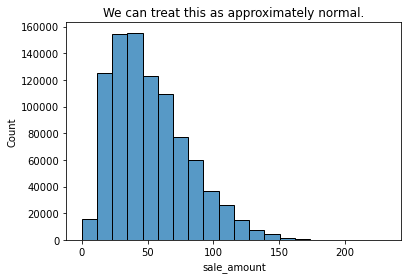

In [44]:
sns.histplot(store_sales.sale_amount, bins = 20)
plt.title('We can treat this as approximately normal.');

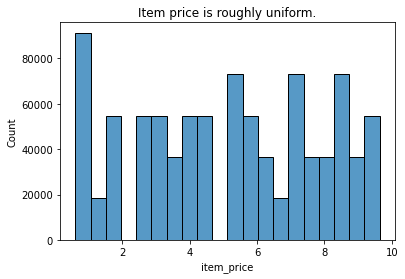

In [45]:
sns.histplot(store_sales.item_price, bins = 20)
plt.title('Item price is roughly uniform.');

### 3

Set the index to be the datetime variable.

In [46]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item           913000 non-null  int64         
 1   sale_amount    913000 non-null  float64       
 2   sale_date      913000 non-null  datetime64[ns]
 3   sale_id        913000 non-null  int64         
 4   store          913000 non-null  int64         
 5   item_brand     913000 non-null  object        
 6   item_name      913000 non-null  object        
 7   item_price     913000 non-null  float64       
 8   item_upc12     913000 non-null  int64         
 9   item_upc14     913000 non-null  int64         
 10  store_address  913000 non-null  object        
 11  store_city     913000 non-null  object        
 12  store_state    913000 non-null  object        
 13  store_zipcode  913000 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(5

In [47]:
store_sales = store_sales.set_index('sale_date').sort_index()
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item           913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_id        913000 non-null  int64  
 3   store          913000 non-null  int64  
 4   item_brand     913000 non-null  object 
 5   item_name      913000 non-null  object 
 6   item_price     913000 non-null  float64
 7   item_upc12     913000 non-null  int64  
 8   item_upc14     913000 non-null  int64  
 9   store_address  913000 non-null  object 
 10  store_city     913000 non-null  object 
 11  store_state    913000 non-null  object 
 12  store_zipcode  913000 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ MB


### 4

Add a 'month' and 'day of week' column to your dataframe.

In [48]:
store_sales['month'] = store_sales.index.strftime('%m-%b')

In [49]:
store_sales['weekday'] = store_sales.index.strftime('%w-%a')

In [50]:
store_sales.head()

,item,sale_amount,sale_id,store,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,weekday
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,01-Jan,2-Tue
2013-01-01,17,26.0,295813,3,Ducal,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,TX,78201,01-Jan,2-Tue
2013-01-01,7,32.0,125995,10,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,TX,78231,01-Jan,2-Tue
2013-01-01,18,45.0,314073,3,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,TX,78201,01-Jan,2-Tue
2013-01-01,19,34.0,332333,3,Careone,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,TX,78201,01-Jan,2-Tue


### 5

Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [51]:
store_sales['sales_total'] = store_sales.sale_amount * store_sales.item_price
store_sales.sales_total.head()

sale_date
2013-01-01     10.92
2013-01-01     30.16
2013-01-01    308.48
2013-01-01    197.55
2013-01-01     25.16
Name: sales_total, dtype: float64

### 6

Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [52]:
from prepare import *

In [53]:
prepare_data(get_store_sales_data()).info()

Reading from .csv file.
Reading from .csv file.
Reading from .csv file.
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item           913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_id        913000 non-null  int64  
 3   store          913000 non-null  int64  
 4   item_brand     913000 non-null  object 
 5   item_name      913000 non-null  object 
 6   item_price     913000 non-null  float64
 7   item_upc12     913000 non-null  int64  
 8   item_upc14     913000 non-null  int64  
 9   store_address  913000 non-null  object 
 10  store_city     913000 non-null  object 
 11  store_state    913000 non-null  object 
 12  store_zipcode  913000 non-null  int64  
 13  month          913000 non-null  object 
 14  weekday        913000 non-null  object 
 15  sales_total    913000 non-null 

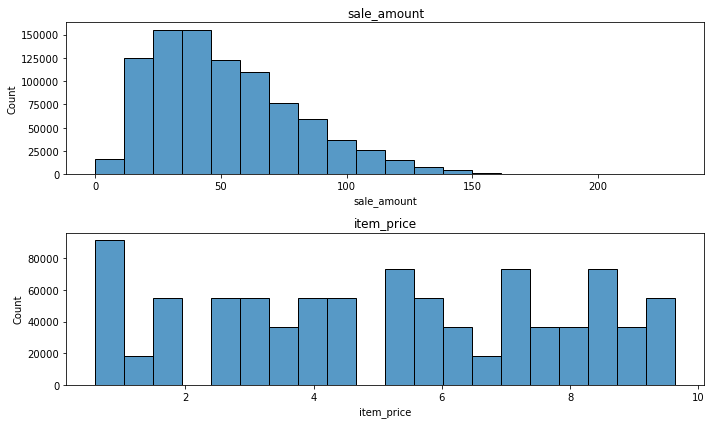

In [54]:
plot_distributions(store_sales[['sale_amount', 'item_price']])

## OPS Data

In [55]:
ops_data = get_open_power_systems_data()
ops_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [56]:
ops_data.columns = [col.replace('+', '_').lower() for col in ops_data.columns]
ops_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         4383 non-null   object 
 1   consumption  4383 non-null   float64
 2   wind         2920 non-null   float64
 3   solar        2188 non-null   float64
 4   wind_solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


### 1

Convert date column to datetime format.

In [57]:
ops_data.date.head()

0    2006-01-01
1    2006-01-02
2    2006-01-03
3    2006-01-04
4    2006-01-05
Name: date, dtype: object

In [58]:
ops_data.date = pd.to_datetime(ops_data.date)
ops_data.date.head(2)

0   2006-01-01
1   2006-01-02
Name: date, dtype: datetime64[ns]

### 2

Plot the distribution of each of your variables.

<Figure size 1296x720 with 0 Axes>

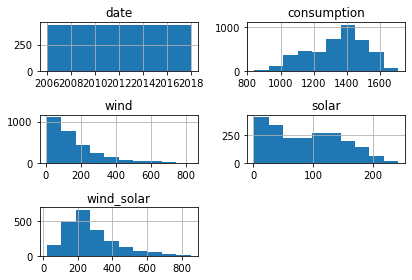

In [59]:
plt.figure(figsize = (18, 10))
ops_data.hist()
plt.tight_layout();

### 3

Set the index to be the datetime variable.

In [60]:
ops_data = ops_data.set_index('date').sort_index()
ops_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   consumption  4383 non-null   float64
 1   wind         2920 non-null   float64
 2   solar        2188 non-null   float64
 3   wind_solar   2187 non-null   float64
dtypes: float64(4)
memory usage: 171.2 KB


### 4

Add a month and a year column to your dataframe.

In [61]:
ops_data['month'] = ops_data.index.strftime('%m-%b')

In [62]:
ops_data['year'] = ops_data.index.year

In [63]:
ops_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   consumption  4383 non-null   float64
 1   wind         2920 non-null   float64
 2   solar        2188 non-null   float64
 3   wind_solar   2187 non-null   float64
 4   month        4383 non-null   object 
 5   year         4383 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 239.7+ KB


### 5

Fill any missing values.

In [64]:
ops_data.describe()

,consumption,wind,solar,wind_solar,year
count,4383.000000,2920.000000,2188.000000,2187.000000,4383.000000
mean,1338.675836,164.814173,89.258695,272.663481,2011.500342
std,165.775710,143.692732,58.550099,146.319884,3.452347
min,842.395000,5.757000,1.968000,21.478000,2006.000000
25%,1217.859000,62.353250,35.179250,172.185500,2008.500000
50%,1367.123000,119.098000,86.407000,240.991000,2012.000000
75%,1457.761000,217.900250,135.071500,338.988000,2014.500000
max,1709.568000,826.278000,241.580000,851.556000,2017.000000


In [65]:
ops_data.tail()

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2017-12-27,1263.94091,394.507,16.530,411.037,12-Dec,2017
2017-12-28,1299.86398,506.424,14.162,520.586,12-Dec,2017
2017-12-29,1295.08753,584.277,29.854,614.131,12-Dec,2017
2017-12-30,1215.44897,721.247,7.467,728.714,12-Dec,2017
2017-12-31,1107.11488,721.176,19.980,741.156,12-Dec,2017


In [66]:
# wind_solar seems to be the sum of wind and solar

ops_data[ops_data.wind_solar.isna()]

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,01-Jan,2006
2006-01-02,1380.521,NaN,NaN,NaN,01-Jan,2006
2006-01-03,1442.533,NaN,NaN,NaN,01-Jan,2006
2006-01-04,1457.217,NaN,NaN,NaN,01-Jan,2006
2006-01-05,1477.131,NaN,NaN,NaN,01-Jan,2006
...,...,...,...,...,...,...
2013-03-30,1092.932,20.545,NaN,NaN,03-Mar,2013
2013-03-31,1002.856,39.624,NaN,NaN,03-Mar,2013
2014-03-12,1516.331,NaN,148.507,NaN,03-Mar,2014


In [67]:
# Let's re-engineer the wind_solar column
# We'll first set all NaNs to 0
ops_data = ops_data.fillna(0)
ops_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   consumption  4383 non-null   float64
 1   wind         4383 non-null   float64
 2   solar        4383 non-null   float64
 3   wind_solar   4383 non-null   float64
 4   month        4383 non-null   object 
 5   year         4383 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 239.7+ KB


In [68]:
# Now all the NaNs are 0. We can re-engineer the wind_solar column
ops_data.wind_solar = ops_data.wind + ops_data.solar

In [69]:
# Let's verify it worked
ops_data[ops_data.solar == 0]

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2006-01-01,1069.184,0.000,0.0,0.000,01-Jan,2006
2006-01-02,1380.521,0.000,0.0,0.000,01-Jan,2006
2006-01-03,1442.533,0.000,0.0,0.000,01-Jan,2006
2006-01-04,1457.217,0.000,0.0,0.000,01-Jan,2006
2006-01-05,1477.131,0.000,0.0,0.000,01-Jan,2006
...,...,...,...,...,...,...
2011-12-31,1077.625,83.185,0.0,83.185,12-Dec,2011
2013-03-30,1092.932,20.545,0.0,20.545,03-Mar,2013
2013-03-31,1002.856,39.624,0.0,39.624,03-Mar,2013


In [70]:
ops_data[ops_data.wind == 0]

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2006-01-01,1069.184,0.0,0.000,0.000,01-Jan,2006
2006-01-02,1380.521,0.0,0.000,0.000,01-Jan,2006
2006-01-03,1442.533,0.0,0.000,0.000,01-Jan,2006
2006-01-04,1457.217,0.0,0.000,0.000,01-Jan,2006
2006-01-05,1477.131,0.0,0.000,0.000,01-Jan,2006
...,...,...,...,...,...,...
2009-12-29,1207.905,0.0,0.000,0.000,12-Dec,2009
2009-12-30,1192.196,0.0,0.000,0.000,12-Dec,2009
2009-12-31,1106.467,0.0,0.000,0.000,12-Dec,2009


In [71]:
ops_data[ops_data.wind_solar == 0]

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,01-Jan,2006
2006-01-02,1380.521,0.0,0.0,0.0,01-Jan,2006
2006-01-03,1442.533,0.0,0.0,0.0,01-Jan,2006
2006-01-04,1457.217,0.0,0.0,0.0,01-Jan,2006
2006-01-05,1477.131,0.0,0.0,0.0,01-Jan,2006
...,...,...,...,...,...,...
2009-12-28,1211.791,0.0,0.0,0.0,12-Dec,2009
2009-12-29,1207.905,0.0,0.0,0.0,12-Dec,2009
2009-12-30,1192.196,0.0,0.0,0.0,12-Dec,2009


Looks good. I believe it is safe to assume that wherever 0s remain that is truly a 0 value and not such that all these values should provide the total in consumption.

### 6

Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [72]:
prepare_ops_data(get_open_power_systems_data()).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   consumption  4383 non-null   float64
 1   wind         4383 non-null   float64
 2   solar        4383 non-null   float64
 3   wind_solar   4383 non-null   float64
 4   month        4383 non-null   object 
 5   year         4383 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 239.7+ KB
